<a href="https://colab.research.google.com/github/alirezash97/Advanced-AI-Course/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

torch.Size([4, 1, 28, 28])
torch.Size([4])


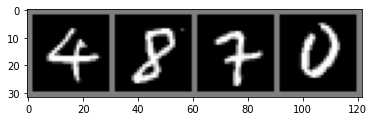

tensor(4)    tensor(8)    tensor(7)    tensor(0)


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('    '.join('%5s' % labels[j] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F 

class Network(nn.Module):
  
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(1, 8, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(8, 16, 6)
    self.fc1 = nn.Linear(16 * 4 * 4, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

Network = Network()


In [5]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(Network.parameters(), lr = 0.001, momentum = 0.9)

In [11]:
for epoch in range(1):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    
    inputs, label = data
    optimizer.zero_grad()
    outputs = Network(inputs)
    loss = loss_function(outputs, label)
    loss.backward()
    optimizer.step()


    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %( epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
    
print('Finished Training Network')


[1,  2000] loss: 1.879
[1,  4000] loss: 0.281
[1,  6000] loss: 0.156
[1,  8000] loss: 0.132
[1, 10000] loss: 0.103
[1, 12000] loss: 0.098
[1, 14000] loss: 0.079
Finished Training Network


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = Network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98 %
